In [2]:
import cv2 as cv
import skimage.io as io
from skimage.color import rgb2gray
from skimage.feature import canny

from skimage.draw import rectangle
import matplotlib.pyplot as plt
import numpy as np
import imutils
import math
from commonFunctions import * 

In [3]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

# sort the characters according to their x-coordinate

In [4]:
def Sort_items(sub_li):
        return(sorted(sub_li, key = lambda x: x[1])) 


# read the image

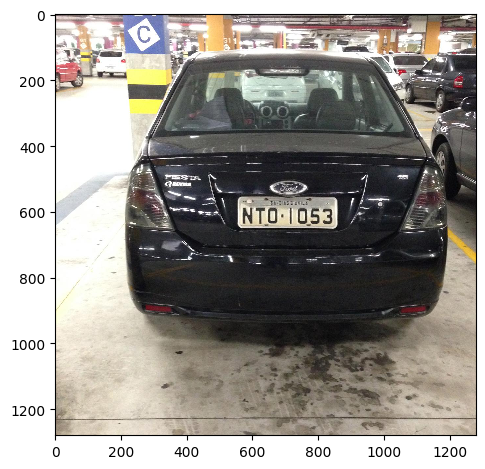

In [5]:
img = io.imread('Carsimage/'+'4'+'.jpeg')[...,:3]
io.imshow(img)

## image preprocessing
1. convert image to greyscale
2. threshold image
3. erosion

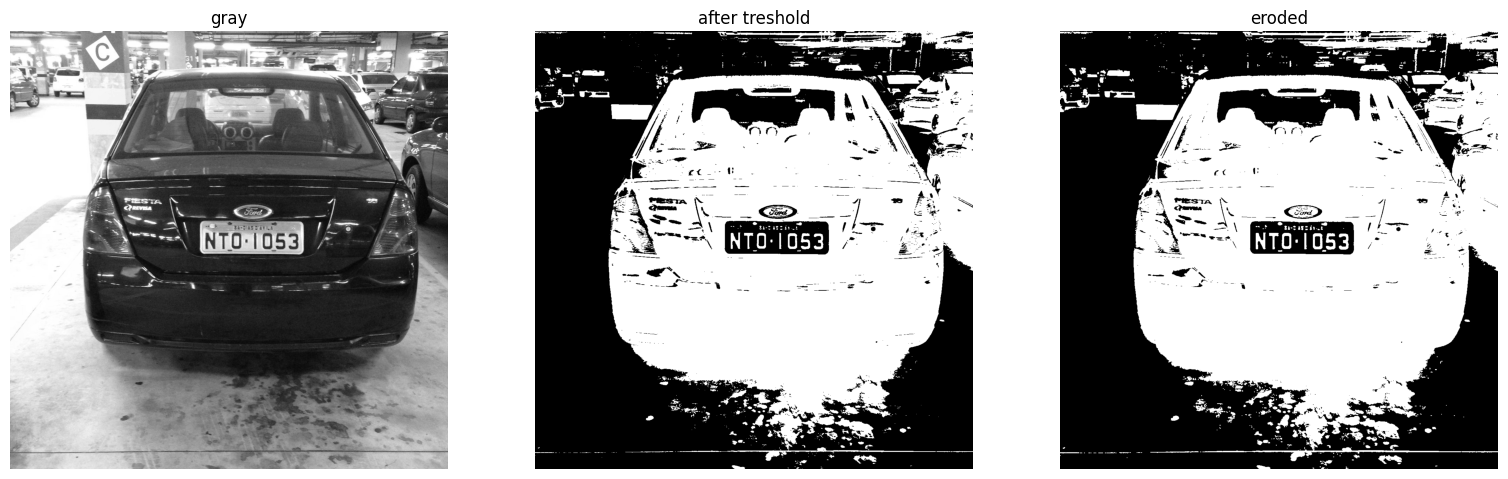

In [6]:
gray =(rgb2gray(img)*255).astype(np.uint8)
(T, threshInv) = cv.threshold(gray, 115, 255,cv.THRESH_BINARY_INV)
kernel = np.ones((2,2),np.uint8)
erosion = cv.dilate(threshInv,kernel,iterations = 1)
show_images([gray,threshInv,erosion],['gray','after treshold','eroded'])

## canny edge detector 

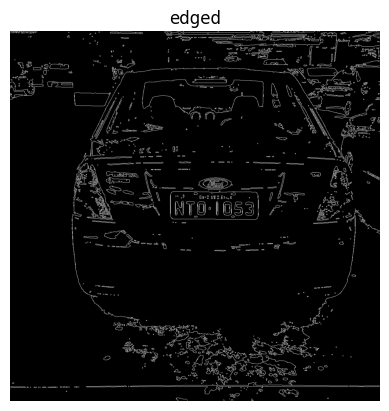

In [7]:
edgedImage = canny(threshInv, sigma=0.5, low_threshold=100, high_threshold=200)
show_images([edgedImage],['edged'])


## finding and sort the contours according to their area

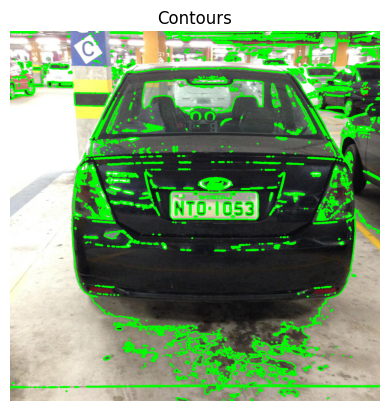

In [8]:
contours,new2 = cv.findContours(edgedImage.copy().astype(np.uint8), cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
imageCopy=img.copy()
contours = sorted(contours, key = cv.contourArea, reverse = True) 
imageCopy=img.copy()
cv.drawContours(imageCopy,contours,-1,(0,255,0),3)
show_images([imageCopy],['Contours'])

## find the plate

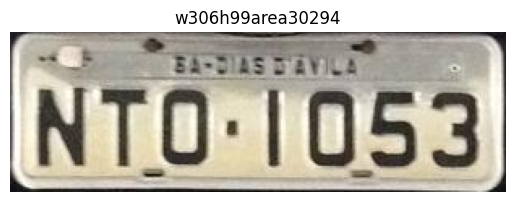

 accurcy 80%


In [9]:
contourImage = None
FinalPlate=None
hieght_of_licence=0
for c in contours:
    x,y,w,h = cv.boundingRect(c) 
    contourImage=img[y:y+h,x:x+w]
    if(89978>=w*h >14000 and w>h and (2 <= w/h <= 4) ): 
            perimeter = cv.arcLength(c, True)
            approx = cv.approxPolyDP(c, 0.018 * perimeter, True)
            if len(approx) == 4: 
                screenCnt = approx
                x,y,w,h = cv.boundingRect(c) 
                FinalPlate=img[y:y+h,x:x+w]
                show_images([FinalPlate],['w'+ f'{w}' +'h'+ f'{h}' +'area'+ f'{w*h}'])
                hieght_of_licence=h
                print(' accurcy 80%')
                break
            else:
                screenCnt = approx
                x,y,w,h = cv.boundingRect(c) 
                FinalPlate=img[y:y+h,x:x+w]
                show_images([FinalPlate],['w'+ f'{w}' +'h'+ f'{h}' +'area'+ f'{w*h}'])
                hieght_of_licence=h
                print('accurcy 60%')
                break


## extract characters

99


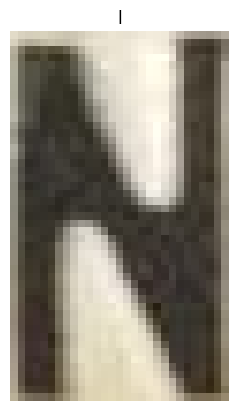

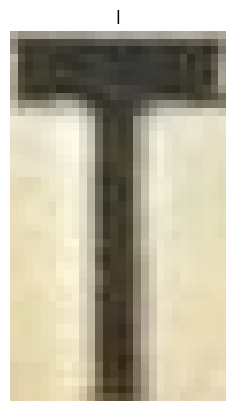

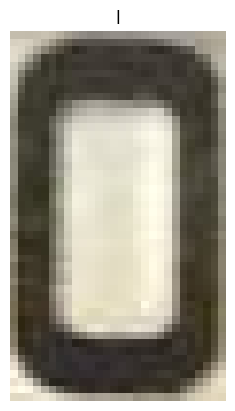

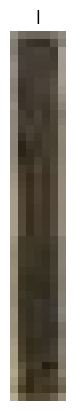

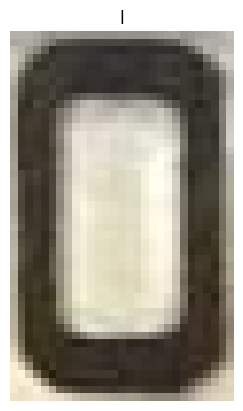

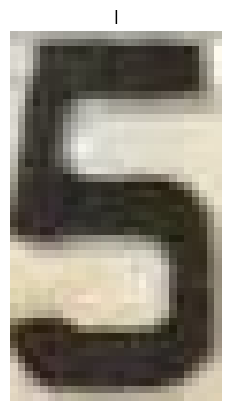

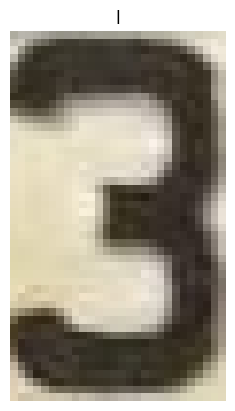

In [10]:
if hieght_of_licence>0:
    print(hieght_of_licence)
    gray_letters =(rgb2gray(FinalPlate)*255).astype(np.uint8)
    (T, threshInv) = cv.threshold(gray_letters, 115, 255,cv.THRESH_BINARY_INV)
    can8 = canny(threshInv, sigma=0.5, low_threshold=100, high_threshold=200)
    cnts4,new2 = cv.findContours(can8.copy().astype(np.uint8), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
    imageCopy=FinalPlate.copy()
    cv.drawContours(imageCopy,cnts4,-1,(0,255,0),3)
    arr_of_letter = []
    for c2 in cnts4:
        perimeter = cv.arcLength(c2, True)
        approx = cv.approxPolyDP(c2, 0.018 * perimeter, True)
        x,y,w,h = cv.boundingRect(c2) 
        Character=FinalPlate[y:y+h,x:x+w]
        if(hieght_of_licence * 0.53 >h> hieght_of_licence*0.22 ): 
            arr_of_letter.append([Character,x])
    sorted_letters=Sort_items(arr_of_letter)
    for img in sorted_letters:
        show_images([img[0]],['l'])